# ```aggregate```: Simple Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash
uw = trash.Underwriter(debug=False)

In [2]:
reload(parser)
reload(trash)
uw = trash.Underwriter(debug=False)

testa1 = """
port Portfolio_1 
    agg LineA 50 claims sev lognorm 12 cv [2, 3, 4] wt [.3 .5 .2] 
    agg LineB 24 claims 10 x 5 sev lognorm 12 cv 3.4 
    LineC 124 claims 120 x 5 sev lognorm 16 cv 3.4
"""

testa2 = """
port Portfolio_2 
    CA 500 prem at .5 lr 15 x 12 sev gamma 12 cv [2 3 4] wt [.3 .5 .2] mixed gamma 0.4
    FL 1.7 claims 100 x 5 sev 10000 * pareto 1.3 - 10000 poisson
    IL 1e-8 * uw.cmp
    OH uw.cmp * 1e-8
    agg NY 500 prem at .5 lr 15 x 12 sev [20 30 40 10] * gamma [9 10 11 12] cv [1 2 3 4] wt =4 mixed gamma 0.4

sev proda 30000 * lognorm 2
"""

testb = """
sev prodc: 50000 * lognorm(3) 
sev weird 50000 * beta(1, 4) + 10000
sev premsop1 25000 * lognorm 2.3; sev premsop2 35000 * lognorm 2.4;
sev premsop3 45000 * \
lognorm 2.8
"""

testc = """
agg Agg_1 20 claims 10 x 2 sev lognorm 12 cv 0.2 mixed gamma 0.8
agg Agg_2 20 claims 10 x 2 sev 15 * lognorm 2.5;
sev premsop1 25000 * lognorm 2.3; 
Agg_3 20 claims 10 x 2 on 25 * lognorm 2 fixed;
"""

testall = testa1 + testa2 + testb + testc
a, b, c = uw.write_test(testall)
del b['note']
agg.html_title('Severities')
display(a)
agg.html_title('Aggregates')
display(b)
agg.html_title('Portfolios')
display(c)

,sev_a,sev_b,sev_cv,sev_loc,sev_mean,sev_name,sev_scale,sev_wt
proda,2.0,0.0,0,0.0,0,lognorm,30000.0,1
prodc,3.0,0.0,0,0.0,0,lognorm,50000.0,1
weird,1.0,4.0,0,10000.0,0,beta,50000.0,1
premsop1,2.3,0.0,0,0.0,0,lognorm,25000.0,1
premsop2,2.4,0.0,0,0.0,0,lognorm,35000.0,1
premsop3,2.8,0.0,0,0.0,0,lognorm,45000.0,1


,exp_attachment,exp_el,exp_en,exp_limit,exp_lr,exp_premium,freq_a,freq_b,freq_name,name,sev_a,sev_b,sev_cv,sev_loc,sev_mean,sev_name,sev_scale,sev_wt
LineA,0.0,0.0,50.000000,inf,0.0,0.0,0.00,0,poisson,LineA,0.0,0,"[2.0, 3.0, 4.0]",0.0,12,lognorm,0.0,"[0.3, 0.5, 0.2]"
LineB,5.0,0.0,24.000000,10.000000,0.0,0.0,0.00,0,poisson,LineB,0.0,0,3.4,0.0,12,lognorm,0.0,1
LineC,5.0,0.0,124.000000,120.000000,0.0,0.0,0.00,0,poisson,LineC,0.0,0,3.4,0.0,16,lognorm,0.0,1
CA,12.0,250.0,0.000000,15.000000,0.5,500.0,0.40,0,gamma,CA,0.0,0,"[2.0, 3.0, 4.0]",0.0,12,gamma,0.0,"[0.3, 0.5, 0.2]"
FL,5.0,0.0,1.700000,100.000000,0.0,0.0,0.00,0,poisson,FL,1.3,0,0,-10000.0,0,pareto,10000.0,1
IL,0.0,0.0,268153.903538,inf,0.0,0.0,0.28,0,poisson,IL,0.0,0,0.5,0.0,0.001,lognorm,0.0,1
OH,0.0,0.0,0.002682,inf,0.0,0.0,0.28,0,poisson,OH,0.0,0,0.5,0.0,100000,lognorm,0.0,1
NY,12.0,250.0,0.000000,15.000000,0.5,500.0,0.40,0,gamma,NY,0.0,0,"[1.0, 2.0, 3.0, 4.0]",0.0,"[180.0, 300.0, 440.0, 120.0]",gamma,0.0,"[0.25, 0.25, 0.25, 0.25]"
Agg_1,2.0,0.0,20.000000,10.000000,0.0,0.0,0.80,0,gamma,Agg_1,0.0,0,0.2,0.0,12,lognorm,0.0,1
Agg_2,2.0,0.0,20.000000,10.000000,0.0,0.0,0.00,0,poisson,Agg_2,2.5,0,0,0.0,0,lognorm,15.0,1


,0,1,2,3,4
Portfolio_1,LineA,LineB,LineC,None,None
Portfolio_2,CA,FL,IL,OH,NY


In [ ]:
uw.list().T

In [ ]:
uw['LineA']

In [ ]:
ob = uw('LineA')
ob

In [ ]:
ob.audit_df

In [ ]:
ob.easy_update()
ob

In [ ]:
ob.audit_df

In [ ]:
uw['ppal']

In [ ]:
ob = uw('ppal')
display(ob.statistics_df)
ob

In [ ]:
testa1 = f"""
port Portfolio_1 
    agg LineA 50 claims sev lognorm 12 cv [{', '.join([str(i) for i in np.linspace(2,5, 20)])}] wt=20 
    agg LineB 24 claims 10 x 5 sev lognorm 12 cv 3.4 
    LineC 124 claims 120 x 5 sev lognorm 16 cv 3.4
"""
testa1d = f"""
port Portfolio_1 
    agg LineA 50 claims sev lognorm 12 cv [1,2,3,4,5] wt=5 
    agg LineB 24 claims 10 x 5 sev lognorm 12 cv 3.4 
    LineC 124 claims 120 x 5 sev lognorm 16 cv 3.4
"""

print(testa1d)

In [ ]:
reload(parser)
reload(trash)
uw = trash.Underwriter(debug=False)
uw

In [ ]:
uw.databases

In [ ]:
uw.list()

In [ ]:
reload(parser)
reload(trash)
uw = trash.Underwriter(debug=False, log2=12, update=True)
p = uw.write(testa1d)
p.plot()
p

In [ ]:
p = uw.write(testa1d, log2=10)
p.plot()
p

In [ ]:
uw.parser.port_out_dict

In [ ]:
p.report('all')

In [ ]:
for ag in p:
    # the underlying aggregates
    print(ag) 
    ag.plot()
    display(ag)

In [ ]:
uw.describe(pretty_print=True);

In [ ]:
uw.describe('severity')

In [ ]:
uw['liaba']

In [ ]:
uw('liabc')

In [ ]:
uw('liabc').plot()

In [ ]:
ag = uw('ppal')
ag.easy_update(14)
ag

In [ ]:
pf = uw('bodoff1')
pf.update(8, 1) 
pf

In [ ]:
pf.plot('density')

In [ ]:
reload(trash)
uw = trash.Underwriter()
uw

In [ ]:
uw['cmp']

In [ ]:
uw['cmp']

In [ ]:
reload(trash)
uw = trash.Underwriter()

In [ ]:
ob = uw('agg MYCMP 0.01 *uw.cmp')
ob.easy_update()

In [ ]:
ob

In [ ]:
sv = agg.Severity('lognorm', sev_mean = 1000, sev_cv = 0.5)

In [ ]:
sv.plot()

In [ ]:
reload(trash)
uw = trash.Underwriter()
c = uw.write('port test a: 0.01 * uw.cmp') 

In [ ]:
c.recommend_bucket()

In [ ]:
c.update(log2=13, bs=100000)

In [ ]:
c.plot(subplots=True, height=4)

In [ ]:
c

In [ ]:
biz = uw['homeowners'] 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)

In [ ]:
biz = uw('homeowners')
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)

In [ ]:
biz.easy_update(10)
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)
biz.report('audit')

In [ ]:
biz.recommend_bucket(verbose=True)

In [ ]:
biz.easy_update(10, verbose=True)

In [ ]:
biz.audit_df

In [ ]:
biz.report('all')

# Script Examples

In [ ]:
reload(trash)
uw = trash.Underwriter()

In [ ]:
s = uw.write('sev MyLN1 12 * lognorm 1; sev MyLN2 12 * lognorm 2; sev MyLN3 12 * lognorm 3; ')

In [ ]:
uw.describe('severity')

In [ ]:
for v in s:
    print(v.moms())
    v.plot()
print([ 12 * np.exp(x*x/2) for  x in [1,2,3]])

In [ ]:
pf = uw.write('port test: PA: 0.0085 * uw.pers_auto; CA: 0.02 * uw.comm_auto;WC: 0.005 * uw.work_comp', update=False, log2=16, bs=10e4, remove_fuzz=True, add_exa=False)

In [ ]:
%timeit pf.update(log2=16, bs=10e4, add_exa=False)

In [ ]:
%timeit pf.update(log2=16, bs=10e4, add_exa=True)

In [ ]:
pf

In [ ]:
pf.report('quick')

In [ ]:
pf.update(log2=16, bs=10e4, add_exa=False)

In [ ]:
pf.plot('audit', aspect=1.4, height=2.25)

## More complex program 

In [ ]:
uw.update=True
uw.log2 = 13
uw.bs = 0.25
uw
warnings.simplefilter('always')

In [ ]:
ans = uw.write("""port my_first_portfolio
    A1: 50  claims          sev gamma 12 cv .30 (mixed gamma 0.014)
    A2: 50  claims 30 xs 10 sev gamma 12 cv .30 (mixed gamma 0.014)
    A3: 50  claims          sev gamma 12 cv 1.30 (mixed gamma 0.014)
    A4: 50  claims 30 xs 20 sev gamma 12 cv 1.30 (mixed gamma 0.14)
    B 15 claims 15 xs 15 sev lognorm 12 cv 1.5 + 2 mixed gamma 4.8
    Cat 1.7 claims 25 xs 5  sev 25 * pareto 1.3 0 - 25 poisson 
    ppa: 1e-8 * uw.ppal
""", add_exa=False, remove_fuzz=True, trim_df=False)

In [ ]:
ans = uw.write("""port my_first_portfolio
    A1: 50  claims          sev gamma 12 cv .30  
    A2: 50  claims 30 xs 10 sev gamma 12 cv .30  
    A3: 50  claims          sev gamma 12 cv 1.30  
    A4: 50  claims 30 xs 20 sev gamma 12 cv 1.30  
    B 15 claims 15 xs 15 sev lognorm 12 cv 1.5 + 2  
    ppa: uw.ppal * 1e-5
    Cat 1.7 claims 25 xs 5  sev 25 * pareto 1.3 0 - 25 poisson""", add_exa=False, remove_fuzz=True, trim_df=False)

In [ ]:
uw['ppal']

In [ ]:
ans.statistics_df

In [ ]:
ans.recommend_bucket()

In [ ]:
ans.update(14, 1, remove_fuzz=True)

In [ ]:
ans.plot('density', subplots=True, logy=True)

In [ ]:
ans.report('audit')

In [ ]:
for a in ans:
    display(a)

In [ ]:
ans.report()

In [ ]:
for col in ['Cat']:
    print(col)
    t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

In [ ]:
type(t2)

In [ ]:
n = np.argwhere(np.isnan(t2))
ans.density_df.filter(regex='p_total|ex(le)?a_A$|loss|F|S|exi_xgta_A$').iloc[n[0][0]-10:n[0][0]+10, :]

In [ ]:
t2[1500:2000]

# Integrated Parser

In [ ]:
uw = agg.Underwriter(debug=True)

In [ ]:
program1 = """
A:    50  claims,             sev  gamma 12 cv .30          mixed gamma 0.014
Ba:  500 loss,                sev lognorm 50 cv .8
Bb:  500 loss,  1000 xs 0     sev lognorm 50 cv .8
Bg:  500 loss,                sev gamma 50 cv .8
C:   500  loss,      75 xs 25, sev lognorm 50 cv .9
D:    25  claims,    30 xs 20,  sev gamma 12 cv 1.30         (mixed gamma 0.85)
Cat1:  1.7 claims,  125 xs 5,   sev 25 * pareto 1.3 - 25 
Cat2:  3.5 claims, 1000 xs 0,  sev 25 * pareto 2.3 0 - 25
"""
program2 = """
Thick:  500 loss,            sev lognorm 50 cv .8
Thin:  500 loss,  1000 xs 0  sev lognorm 50 cv .8
Cat:  2 claims,  1250 xs 5,  sev 25 * pareto 1.3 - 25 
"""

program3 = '''
MyWC: 0.005 * uw.work_comp
InHomCA: uw.comm_auto * 0.002 ;
HomCA: 0.001 * uw.comm_auto
Cat: 50000000 loss 1e9 xs 0 sev 50000000 * pareto 1.3 - 50000000'''

In [ ]:
ans1 = uw.write(program1, 'script example 1', True, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)

In [ ]:
ans2 = uw.write(program2, 'script example 2', True, False, log2=10, remove_fuzz=True, trim_df=False)
ans3 = uw.write(program3, 'script example 3', True, False, log2=11, padding=2, remove_fuzz=True, trim_df=False)
# %timeit ans = uw.write(program, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
ans = [ans1, ans2, ans3]

In [ ]:
for a in ans:
    a.report()
    a.plot('density', subplots=True, logy=True)

In [ ]:
ans[2].q(.999)

In [ ]:
uw['liaba']

In [ ]:
agg.Severity(**uw['liaba'][1]).plot()

In [ ]:
ans = uw.write('sev CA_PPA lognorm 12 cv 2; sev ilppa 12 * lognorm 2.1')
ans

In [ ]:
for a in ans:
    a.plot()

# Distortions and Pricing

## Line names must match ```r'[a-zA-Z][a-zA-Z0-9_]*'```

In [ ]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 50 claims             | [50, 100, 150, 200] xs 0 | sev lognorm 12 cv [1,2,3,4] wts [0.25 .25 .25 .25] | poisson           |
| low         | 500 premium at 0.5    | 5 xs 5                   | sev gamma 12 cv .30                                | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.4   |
| xsa         | 50  claims            | 30 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.8   |
| hcmp        | 1e-8 * uw.cmp         |                          |                                                   |                   |
"""

In [ ]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=12, remove_fuzz=True)

In [ ]:
a = agg.axiter_factory(None, 24, aspect=1.4, height=2)
port.plot('quick', axiter=a)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2, logy=True, ylim=[1e-10, 1e-2])
a.tidy()
agg.suptitle_and_tight('Density Plots for Portfolio 1')

In [ ]:
port.plot('audit', aspect=1.2, height=2.5)

In [ ]:
port.plot('priority', aspect=1.2, height=2.5)

In [ ]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 0.50 claims           | [50, 100, 150, 2000] xs 0 | sev 12 * lognorm [1,2,3,14] wts [0.25 .25 .25 .25] | poisson           |
| low         | 1.500 claims          | 1250 xs 5                | sev 400 * pareto 2.2 - 400                           | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.4   |
| hard        | 50  claims            | 30 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.8   |
"""

In [ ]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=14, bs=0.5, remove_fuzz=True)

In [ ]:
port.recommend_bucket()

In [ ]:
port.report('audit')

In [ ]:
port.plot('density', subplots=True,)
port.plot('density', subplots=True, logy=True)

In [ ]:
port.uat(verbose=True,);

In [ ]:
K = port.q(0.995)  # Resonable capital scale
LR = 0.7
K

In [ ]:
cd = port.calibrate_distortions(LRs=[LR], As=[K])

In [ ]:
cd

In [ ]:
dd = agg.Distortion.distortions_from_params(cd, (K, LR), plot=True)

In [ ]:
dd

In [ ]:
ans_table, ans_stacked = port.apply_distortions(dd, As=[port.q(0.99), port.q(0.995), port.q(0.999)], num_plots=2)

# Another Interesting Example

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash
uw = trash.Underwriter(debug=False)

In [ ]:
reload(trash)
uw  = trash.Underwriter()

In [ ]:
uw['cata']

In [ ]:
uw.update = True
uw.log2 = 10
ag = uw('agg myCatA 2 claims sev 10000*uw.cata')
ag.plot()

In [ ]:
ag

In [ ]:
uw.update = False
uw.verbose = False
pf = uw("""port small_large 
       cat 2 claims sev 10000 * pareto 1.3  - 10000
       noncat 120 claims sev lognorm 1000 cv 0.5""")
pf

In [ ]:
pf.recommend_bucket()

In [ ]:
pf.update(log2=18, bs=10000, padding=1, add_exa=False)
pf.plot(subplots=True, logy=True)
pf

In [ ]:
pf

In [ ]:
pf.plot()

In [ ]:

f = sns.factorplot(x='return', y='value', row='line', col='method', size=2.5, kind='bar',
                           data=ans_stacked.query(' stat=="lr" ')) 

In [ ]:
f.fig

In [ ]:
ft = lambda x: np.fft.fft(x)

In [ ]:
ift = lambda x : np.fft.ifft(x)

In [ ]:
def eg(cv, mean, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    p = np.real(ift(np.exp(mean * (fz-1))))
    c2 = cv*cv
    k = 1/c2
    P = mean * c2
    nb = np.real(ift( (1+P-P*fz)**-k ))
    df = pd.DataFrame(dict(x=range(N), poisson=p, negbin=nb))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    nbm, nbm2, nbm3 = ((df.x**k * df.negbin).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    nbv = nbm2 - nbm*nbm
    c = (nbv/nbm-1)/nbm,
    display(pd.DataFrame(dict(k=k, P=P, pm=pm, pv=pv, nbm=nbm, nbv=nbv, enbv=mean*(1+cv*cv*mean), c=c, nbm3=nbm3, nbm3th=(k*P)**2*(3*(1+P)+P*k)+k*P*(1+P)*(1+2*P)), index=['Sample']))
    return df

In [ ]:
a = eg(.81, 20, 10, logy=True)

In [ ]:
(df.x**2 * df.poisson).sum()

In [ ]:
from scipy.special import kv

In [ ]:
kv(0.5, np.linspace(0,10,20))

In [ ]:
def sichel(α, β, γ, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    ξ = β / np.sqrt(1 - 2*β/α)
    ω = np.sqrt(ξ*ξ + α*α) - ξ
    kgo = kv(γ, ω)
    rad = np.sqrt(1-2*β*(fz-1))
    mean = ξ*kv(γ+1, ω)/kgo
    print(rad)
    p = np.real(ift(np.exp(mean * (fz-1))))
    sichel = np.real(ift( kv(γ, ω*rad) / (kgo * rad**γ) ))
    print(kv(γ, ω*rad))
    df = pd.DataFrame(dict(x=range(N), poisson=p, sichel=sichel))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    sichelm, sichelm2, sichelm3 = ((df.x**k * df.sichel).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    sichelv = sichelm2 - sichelm*sichelm
    display(pd.DataFrame(dict(α=α, β=β, γ=γ, ξ=ξ, ω=ω, pm=pm, pv=pv, sichelm=sichelm, sichelv=sichelv, cv=np.sqrt(sichelv) / sichelm), index=['Sample']))
    return df

In [ ]:
sichel(10, 8, -0.5, 8)

In [ ]:
def pois_pas(claims, claimants_per_claim, cv_claimants, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    c2 = cv_claimants*cv_claimants
    k = 1/c2
    P = claimants_per_claim * c2
    θ = claims / claimants_per_claim
    p = np.real(ift(np.exp(claims * (fz-1))))  
#     nb = np.real(ift( (1+P-P*fz)**-k ))
    pois_pas = np.real(ift( np.exp(θ*((1+P-P*fz)**-k - 1))))
    df = pd.DataFrame(dict(x=range(N), poisson=p, pois_pas=pois_pas))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    pois_pasm, pois_pasm2, pois_pasm3 = ((df.x**k * df.pois_pas).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    pois_pasv = pois_pasm2 - pois_pasm*pois_pasm
    display(pd.DataFrame(dict(mean=claims, claimants=claimants_per_claim, cv_claimants=cv_claimants, k=k, P=P, θ=θ, pm=pm, pv=pv, pois_pasm=pois_pasm, pois_pasv=pois_pasv, cvest=np.sqrt(pois_pasv) / pois_pasm), index=['Sample']))
    return df

In [ ]:
df = pois_pas(10, 1.1, 2, 8)

In [ ]:
df = pois_pas(10, .55, 2.1, 8, logy=True)

In [ ]:
def _(x, y):
    return x+y

_(3, 9)

In [ ]:
a = dict(a=123,b=99)
b = a
a, b

In [ ]:
a = dict(x=0, y=-10)
a, b

In [ ]:
a

In [ ]:
{'c': 100, **a}

In [ ]:
import warnings

In [ ]:
def f(x):
    if x > 10:
        warnings.warn('Big input')
    return x / 10

In [ ]:
f(3)

In [ ]:
f(3213)

In [ ]:
warnings.simplefilter('ignore')
warnings.simplefilter('error')

In [ ]:
        pf = uw('''
        port MyCompanyBook
            agg LineA 100 claims 100000 xs 0 sev lognorm 30000 cv 1.25
            agg LineB 150 claims 250000 xs 5000 sev lognorm 50000 cv 0.9
            agg Cat 2 claims 100000000 xs 0 sev 500000 * pareto 1.8 - 500000
        ''')

In [ ]:
df = pf.recommend_bucket()

In [ ]:
df

In [ ]:
sys.path.insert(0,'/s/telos/python/')

In [ ]:
import great as grt

In [ ]:
grt.tabulate(df, ',.1f', True)

In [ ]:

bs = 10000
pf.update(13, bs)
pf.report('quick')
pf.plot('density')
pf.plot('density', logy=True)
pf

In [ ]:
print(pf)

In [ ]:
dir(agg.Distortion)

In [ ]:
agg.Distortion.available_distortions()

In [ ]:
warnings.simplefilter('default')

In [ ]:
agg.Distortion.test()

In [ ]:
agg.insurability_triangle()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash
uw = trash.Underwriter(debug=False)

In [2]:
class qd(object):
    """
    quick display  
    
    """
    
    # Set CSS properties for th elements in dataframe
    th_props = [
      ('font-size', '11px'),
      ('text-align', 'center'),
      ('font-weight', 'bold'),
      ('color', '#6d6d6d'),
      ('background-color', '#f7f7f9')
      ]

    # Set CSS properties for td elements in dataframe
    td_props = [
          ('font-size', '10px'),
          ('text-align', 'left')
      ]

    # Set table styles
    styles = [
      dict(selector="th", props=th_props),
      dict(selector="td", props=td_props)
      ]

    cm = sns.light_palette("green", as_cmap=True)
    
    def __init__(self, d):
        self.x = d
        
    def _repr_html_(self):
        if isinstance(self.x, dict):
            return pd.DataFrame(self.x, index=[len(d)])._repr_html_()
        elif isinstance(self.x, pd.DataFrame):
            # do a bit of styling 
            num_cols = self.x.select_dtypes(np.number).columns
            fmt = {}
            for a, b in zip(self.x.columns, self.x.dtypes):
                if np.issubdtype(b, np.number):
                    m, s =  self.x[a].agg([np.mean, np.std])
                    x = np.abs(m) + 3 * s
                    if abs(x) > self.x[a].max():
                        x = self.x[a].max()
                    if x < 10:
                        fmt[a] = '{:7.3f}'
                    elif x < 1000:
                        fmt[a] = '{:7.1f}'
                    elif x < 10e6:
                        fmt[a] = '{:12,.1f}'
                    else:
                        fmt[a] = '{:12.3e}'
                else:
                    fmt[a] = '{:}'

            return (df.style
                          .background_gradient(cmap=cm, subset=num_cols)
                          .highlight_max(subset=num_cols)
                       #   .set_caption('This is a custom caption.')
                          .format(fmt)
                          .set_table_styles(styles))._repr_html_()

In [3]:
uw.update = False
# basic = uw('''
# port basic
#     ppa 4000 claims 1e6 x 0 sev lognorm 10000 cv 15
#     ho  800 claims 2e6 x 0 sev gamma 50000 cv 10
#     cat 2 claims 20e6 x 0 sev 1e5 * pareto 2.1 - 1e5
# ''')

In [4]:
# uw['interesting_cat']

('portfolio',
 {'arg_dict': {'bs': 10, 'log2': 14, 'sev_calc': 'discrete'},
  'note': 'pareto and lognormal cat with different tail characteristics',
  'spec': [{'exp_en': 3.5,
    'exp_limit': 40000,
    'freq_name': 'poisson',
    'name': 'lognormalcat',
    'sev_a': 1.25,
    'sev_name': 'lognorm',
    'sev_scale': 45.783336177161424},
   {'exp_en': 2,
    'freq_name': 'poisson',
    'name': 'paretocat',
    'sev_a': 1.25,
    'sev_loc': -50,
    'sev_name': 'pareto',
    'sev_scale': 50},
   {'exp_en': 10000,
    'exp_limit': 500,
    'freq_name': 'poisson',
    'name': 'attrit',
    'sev_a': 1.25,
    'sev_cv': 1.75,
    'sev_mean': 1,
    'sev_name': 'lognorm'}]})

In [2]:
# this is about Intereseting_Cat Example See LCA_08_25
# 
basic = uw('''
port basic
    attrit 10000 claims 500 x 0 sev lognorm 1 cv 1.75 mixed gamma 0.5
    paretoccat 2 claims      sev 50 * pareto 1.25 - 50
    lognccat  3.5 claims 40e3 x 0 sev 200 * lognorm 1.25 
''')

/s/telos/python/aggregate_project\aggregate\utils.py:681: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1945: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [34]:
# basic = uw('interesting_cat')

WARNING target cv 1.75 and achieved cv 1.941837578678403 not close


/s/telos/python/aggregate_project\aggregate\utils.py:681: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1945: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)
/s/telos/python/aggregate_project\aggregate\utils.py:472: RuntimeWarning: overflow encountered in long_scalars
  freq_3 = freq_1 * (1 + freq_1 * (3 + freq_1))
/s/telos/python/aggregate_project\aggregate\utils.py:691: RuntimeWarning: overflow encountered in long_scalars
  skew = (ex3 - 3 * ex1 * ex2 + 2 * ex1 ** 3) / sd ** 3
/s/telos/python/aggregate_project\aggregate\utils.py:137: RuntimeWarning: invalid value encountered in log
  mu = np.log(m - shift) - sigma ** 2 / 2


In [16]:
basic.recommend_bucket()

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1945: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
attrit,32.725301,16.362651,8.181325,4.090663,2.045331,1.022666,0.511333,0.127833,0.031958
pareto_cat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
logncat,39.062500,19.531250,9.765625,4.882812,2.441406,1.220703,0.610352,0.152588,0.038147
total,71.787801,35.893901,17.946950,8.973475,4.486738,2.243369,1.121684,0.280421,0.070105


In [3]:
basic.update(14, 10,  add_exa=True, remove_fuzz=True, approx_freq_ge=100, approx_type='slognorm', discretization_calc='distribution', trim_df=False)
basic

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
attrit,9999.996931,10009.1,0.000910986,0.500406,0.499216,-0.00237808,25180
lognccat,1528.372498,1528.38,2.69997e-06,1.155440,1.15544,1.98434e-06,8180
paretoccat,400.000000,335.891,-0.160272,NaN,5.8959,NaN,3660
total,11928.369429,11868.9,-0.00498933,0.147744,0.472523,2.19827,28510


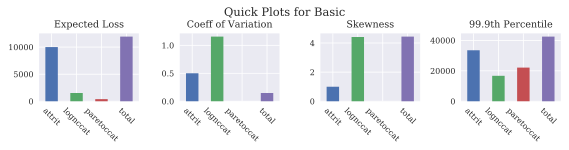

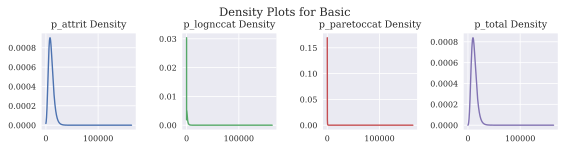

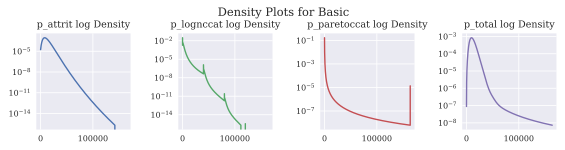

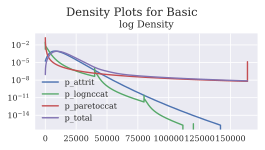

In [45]:
basic.plot('quick')
basic.plot('density', subplots=True)
basic.plot('density', subplots=True, logy=True)
basic.plot('density', aspect=1.9, logy=True)

# The plot of EXEQA is very intesting... different behaviours at different size losses

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


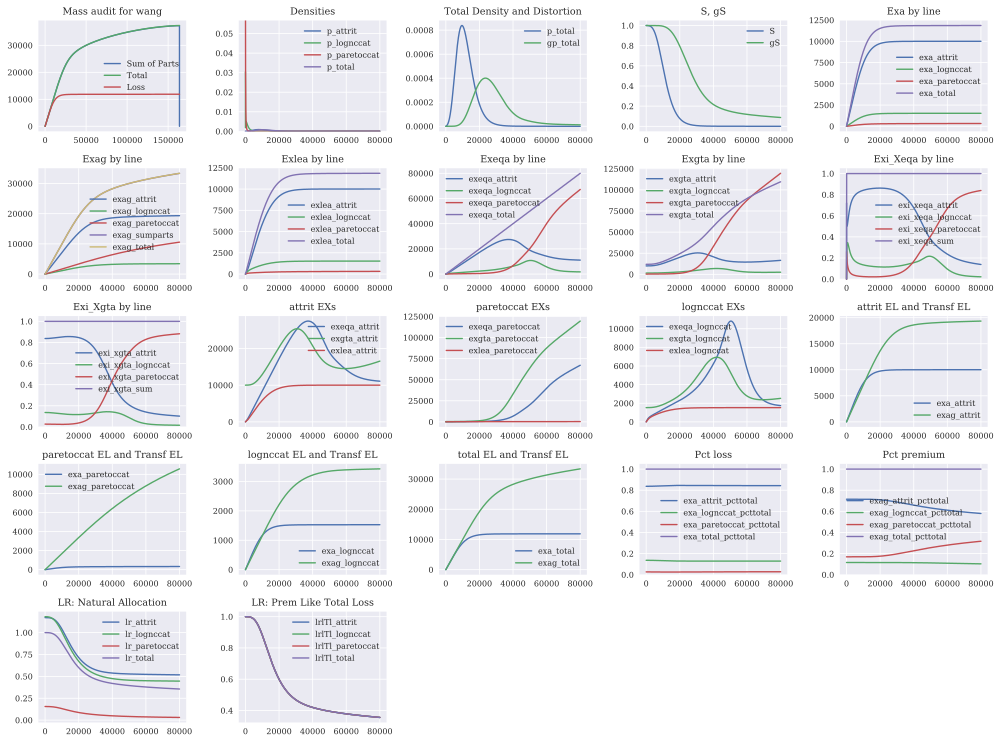

In [46]:
axiter = agg.axiter_factory(None, 24, aspect=1.4)
distort = agg.Distortion('wang', 2.25)
df, audit = basic.apply_distortion(distort, axiter)

In [22]:
params = basic.calibrate_distortions(LRs=[0.85, 0.90], Ps=[0.99, 0.98], r0=0.025)
params

$S$   $\iota$  $\delta$     $\nu$          $EL$  \
$a$     LR   method                                                         
28470.0 0.85 ph      0.009996  0.142889  0.125025  0.874975  11805.994010   
             wang    0.009996  0.142889  0.125025  0.874975  11805.994010   
             lep     0.009996  0.142889  0.125025  0.874975  11805.994010   
             ly      0.009996  0.142889  0.125025  0.874975  11805.994010   
             clin    0.009996  0.142889  0.125025  0.874975  11805.994010   
        0.90 ph      0.009996  0.085445  0.078719  0.921281  11805.994010   
             wang    0.009996  0.085445  0.078719  0.921281  11805.994010   
             lep     0.009996  0.085445  0.078719  0.921281  11805.994010   
             ly      0.009996  0.085445  0.078719  0.921281  11805.994010   
             clin    0.009996  0.085445  0.078719  0.921281  11805.994010   
25540.0 0.85 ph      0.020017  0.177428  0.150691  0.849309  11763.767396   
             wang    0.020017  0.177428  0.150691  0.849309  11763.767396   
             lep     0.020017  0.177428  0.150691  0.849309  11763.767396   
             ly      0.020017  0.177428  0.150691  0.849309  11763.767396   
             clin    0.020017  0.177428  0.150691  0.849309  11763.767396   
        0.90 ph      0.020017  0.104826  0.094880  0.905120  11763.767396   
             wang    0.020017  0.104826  0.094880  0.905120  11763.767396   
             lep     0.020017  0.104826  0.094880  0.905120  11763.767396   
             ly      0.020017  0.104826  0.094880  0.905120  11763.767396   
             clin    0.020017  0.104826  0.094880  0.905120  11763.767396   

                              $P$      Levg           $K$       ROE     param  \
$a$     LR   method                                                             
28470.0 0.85 ph      13889.404717  0.952595  14580.595283  0.142889  0.685321   
             wang    13889.404717  0.952595  14580.595283  0.142889  0.385970   
             lep     13889.404717  0.952595  14580.595283  0.142889  0.310856   
             ly      13889.404717  0.952595  14580.595283  0.142889  0.788800   
             clin    13889.404717  0.952595  14580.595283  0.142889  1.244706   
        0.90 ph      13117.771122  0.854454  15352.228878  0.085445  0.782840   
             wang    13117.771122  0.854454  15352.228878  0.085445  0.247101   
             lep     13117.771122  0.854454  15352.228878  0.085445  0.160006   
             ly      13117.771122  0.854454  15352.228878  0.085445  0.376825   
             clin    13117.771122  0.854454  15352.228878  0.085445  1.097694   
25540.0 0.85 ph      13839.726348  1.182855  11700.273652  0.177428  0.671716   
             wang    13839.726348  1.182855  11700.273652  0.177428  0.396190   
             lep     13839.726348  1.182855  11700.273652  0.177428  0.343960   
             ly      13839.726348  1.182855  11700.273652  0.177428  0.847002   
             clin    13839.726348  1.182855  11700.273652  0.177428  1.261410   
        0.90 ph      13070.852662  1.048256  12469.147338  0.104826  0.774232   
             wang    13070.852662  1.048256  12469.147338  0.104826  0.252747   
             lep     13070.852662  1.048256  12469.147338  0.104826  0.179124   
             ly      13070.852662  1.048256  12469.147338  0.104826  0.416327   
             clin    13070.852662  1.048256  12469.147338  0.104826  1.110071   

                            error  
$a$     LR   method                
28470.0 0.85 ph      3.437903e-06  
             wang    7.095987e-07  
             lep    -2.699890e-07  
             ly     -3.637979e-12  
             clin   -1.818989e-12  
        0.90 ph      5.584297e-10  
             wang    7.659577e-06  
             lep     0.000000e+00  
             ly     -2.117917e-06  
             clin    0.000000e+00  
25540.0 0.85 ph      1.799001e-06  
             wang    1.182343e-10  
             lep    -6.442040e-06  
        

/s/telos/python/aggregate_project\aggregate\spectral.py:144: RuntimeWarning: invalid value encountered in sqrt
  rad = np.sqrt(mb * mb - 4 * a * c)
/s/telos/python/aggregate_project\aggregate\spectral.py:147: RuntimeWarning: invalid value encountered in maximum
  return np.where(x < d, 0, np.maximum(0, u))


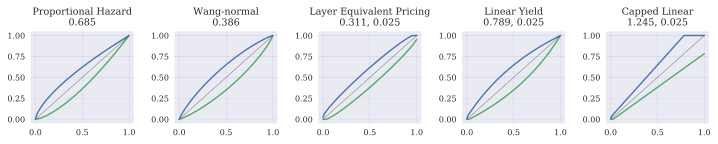

In [23]:
gs = agg.Distortion.distortions_from_params(params, (basic.q(0.99), 0.85), r0=0.025)

In [24]:
gs

{'clin': clin (1.2447064979337383, 0.025),
 'lep': lep (0.31085637629741864, 0.025),
 'ly': ly (0.7888001961878108, 0.025),
 'ph': ph (0.685321016653392),
 'wang': wang (0.3859696496344877)}

#### The first apply distortion was random and extreme. Now we apply Wang with a more reasonable shift. 

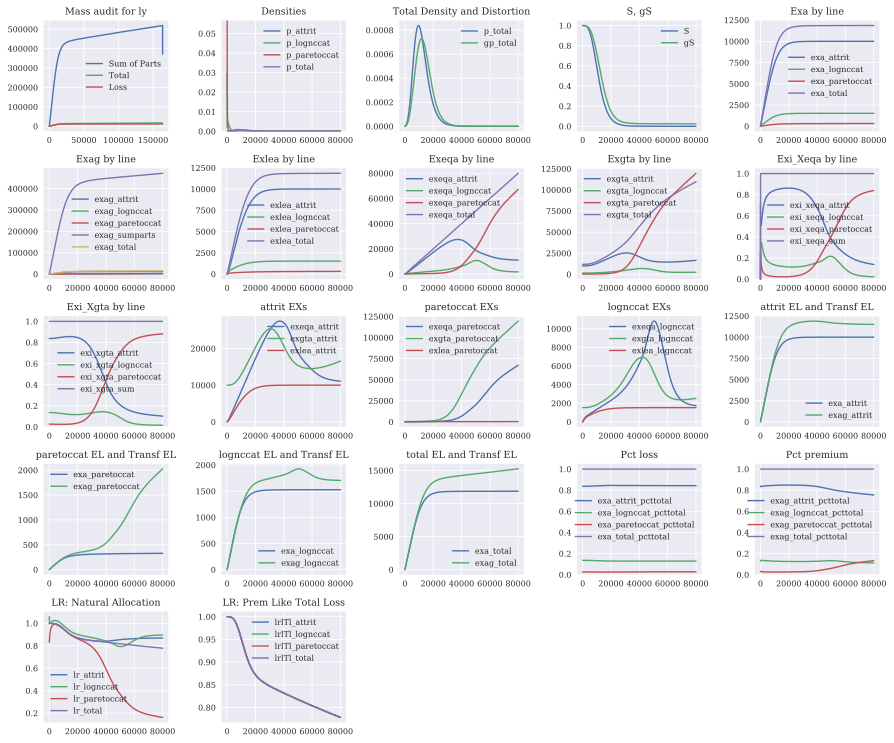

In [26]:
axiter = agg.axiter_factory(None, 24, aspect=1.25)
df, au = basic.apply_distortion(gs['ly'] , axiter)

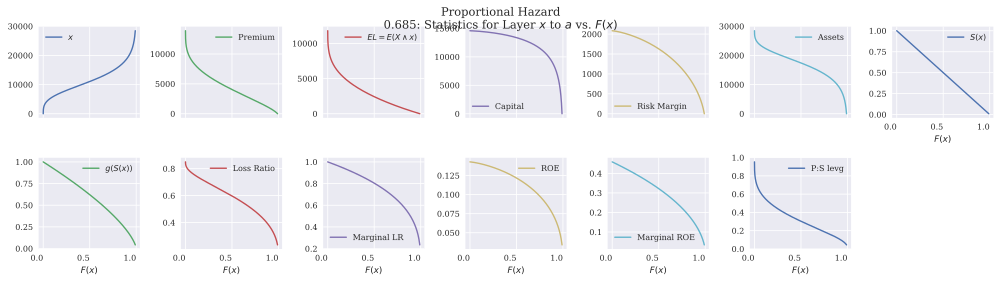

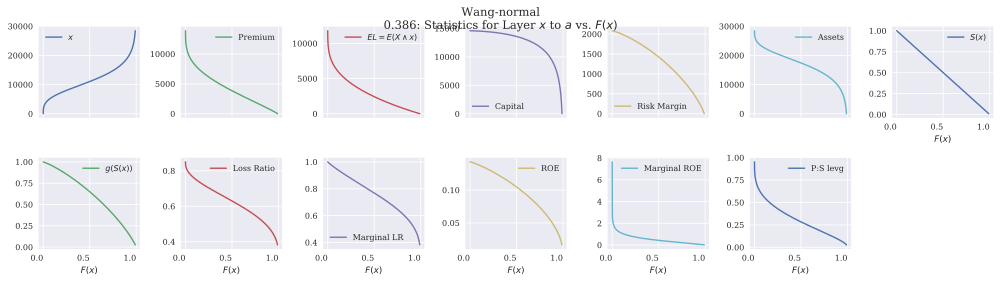

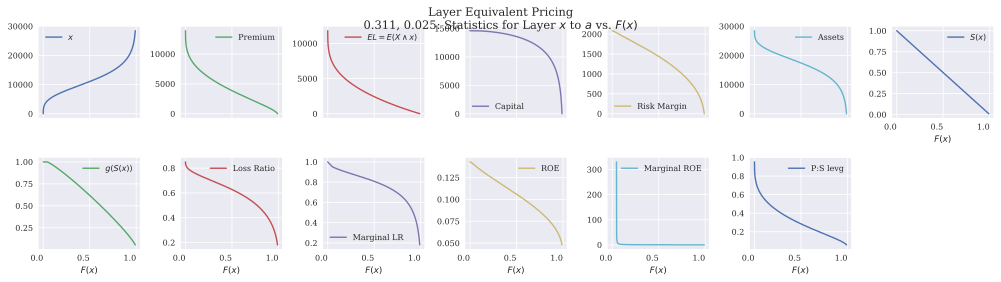

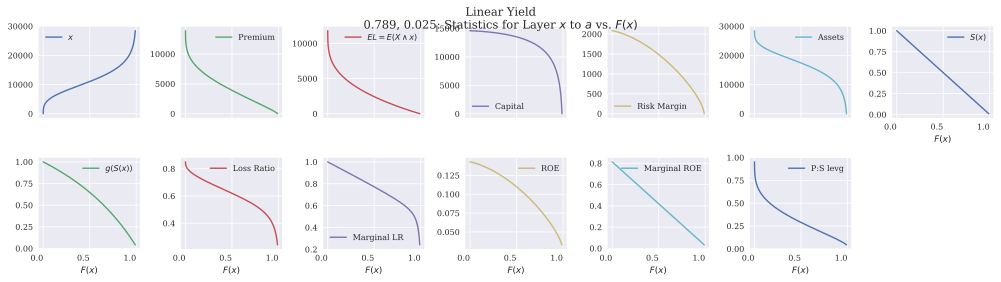

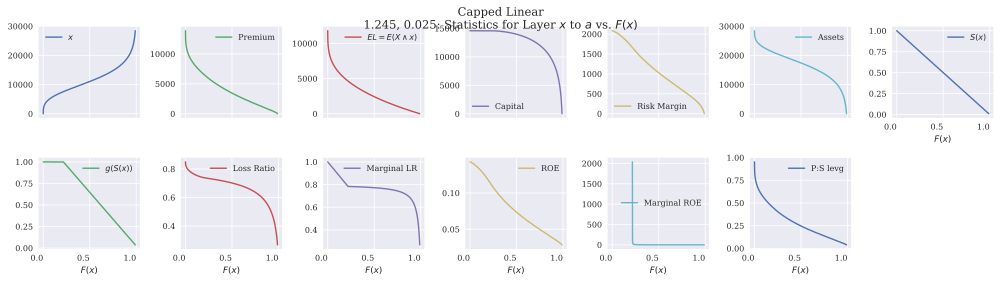

In [54]:
test = basic.top_down(gs, 0.99)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/s/telos/python/aggregate_project\aggregate\spectral.py:129: RuntimeWarning: invalid value encountered in sqrt
  return np.minimum(1, d + (1 - d) * x + spread * np.sqrt(x * (1 - x)))
/s/telos/python/aggregate_project\aggregate\spectral.py:129: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(1, d + (1 - d) * x + spread * np.sqrt(x * (1 - x)))


,loss,S,exa_total,exa_attrit,exa_paretoccat,exa_lognccat,exag_attrit,exag_paretoccat,exag_lognccat,exag_sumparts,exag_total,lr_attrit,lr_paretoccat,lr_lognccat,lr_total,method,return
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11509.872727,497.388542,1721.222244,224807.350482,13729.770012,0.863780,0.613270,0.880589,0.856807,ph,50.0
28470.0,28470.0,0.009996,11805.994010,9975.279276,308.685611,1520.981300,11626.375165,520.616182,1741.104914,229680.420131,13889.404721,0.857987,0.592924,0.873572,0.850000,ph,100.0
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11665.325425,397.074513,1720.761545,252322.281881,13784.386547,0.852269,0.768202,0.880825,0.853412,wang,50.0
28470.0,28470.0,0.009996,11805.994010,9975.279276,308.685611,1520.981300,11746.355900,407.841030,1733.973212,257459.994900,13889.404718,0.849223,0.756877,0.877165,0.850000,wang,100.0
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11512.398451,476.219632,1712.534451,279809.820874,13702.833989,0.863591,0.640531,0.885057,0.858492,lep,50.0
28470.0,28470.0,0.009996,11805.994010,9975.279276,308.685611,1520.981300,11645.954707,504.597179,1737.101439,285239.052855,13889.404717,0.856545,0.611747,0.875586,0.850000,lep,100.0
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11662.864070,367.520464,1714.267654,307259.306928,13745.872182,0.852449,0.829976,0.884162,0.855804,ly,50.0
28470.0,28470.0,0.009996,11805.994010,9975.279276,308.685611,1520.981300,11771.911808,382.365874,1733.894302,313018.629430,13889.404717,0.847380,0.807304,0.877205,0.850000,ly,100.0
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11697.921425,350.741462,1713.710523,334769.552432,13763.594977,0.849895,0.869681,0.884449,0.854702,clin,50.0
28470.0,28470.0,0.009996,11805.994010,9975.279276,308.685611,1520.981300,11792.939198,364.079596,1731.153191,340798.206044,13889.404717,0.845869,0.847852,0.878594,0.850000,clin,100.0


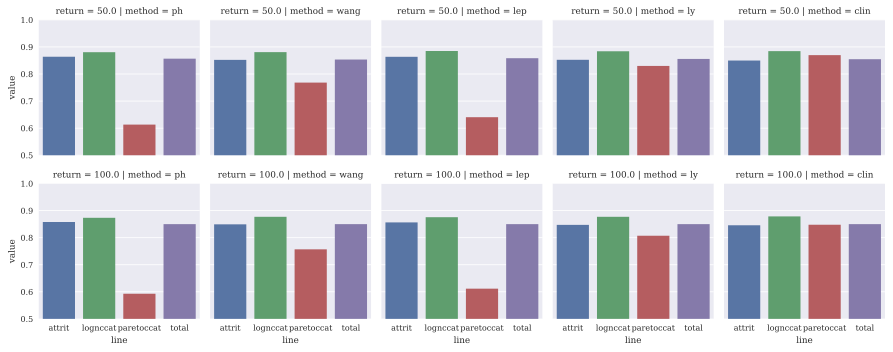

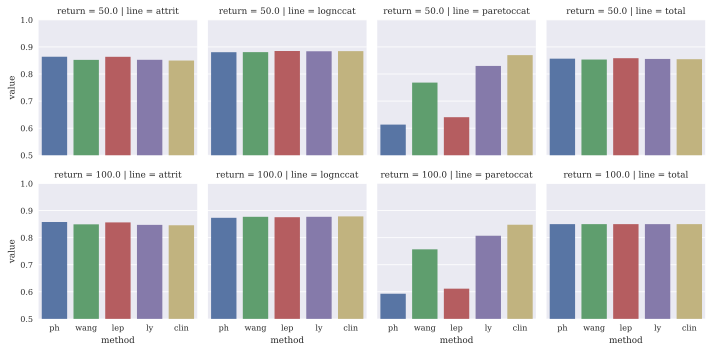

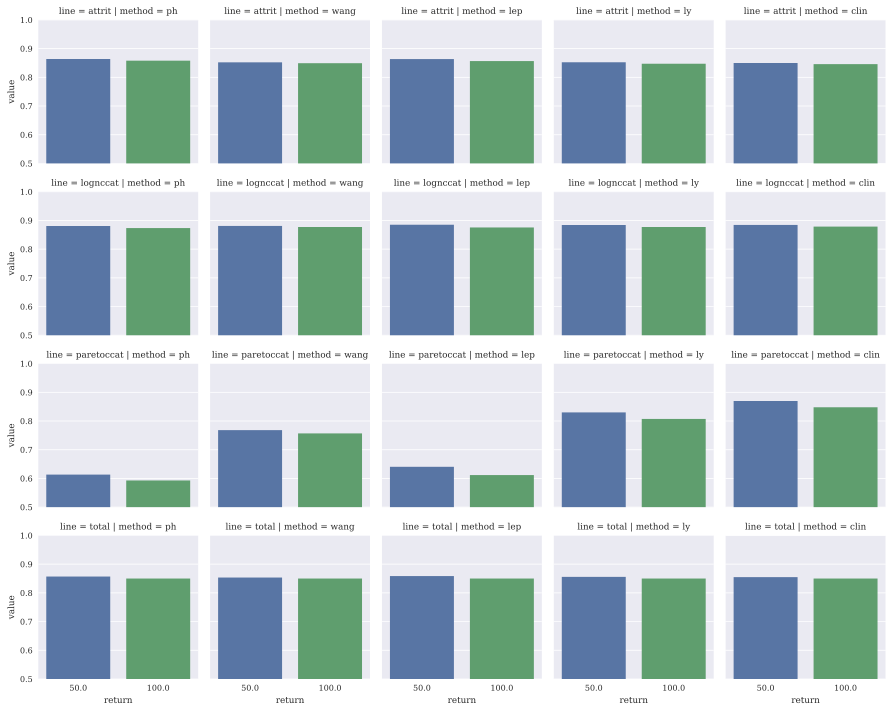

In [56]:
ans = basic.apply_distortions(gs, Ps=[0.98, 0.99], num_plots=3)

In [6]:
a, p, test, arams, dd, table, stacked = basic.uat(LRs=[0.9], verbose=True)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/s/telos/python/aggregate_project\aggregate\spectral.py:129: RuntimeWarning: invalid value encountered in sqrt
  return np.minimum(1, d + (1 - d) * x + spread * np.sqrt(x * (1 - x)))
/s/telos/python/aggregate_project\aggregate\spectral.py:129: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(1, d + (1 - d) * x + spread * np.sqrt(x * (1 - x)))


,exag_attrit,attrit,err_attrit,exag_paretoccat,paretoccat,err_paretoccat,exag_lognccat,lognccat,err_lognccat,exag_total,total,err_total,exag_sumparts,err sum/total,a,applyLR,target,errs
clin,11086.303594,11086.303594,2.220446e-15,336.563909,336.563909,-9.992007e-16,1646.825075,1646.825075,2.220446e-16,13070.852662,13070.852662,-5.551115e-16,379064.503655,28.000748,25540.0,0.9,0.9,-2.220446e-16
lep,11012.157931,11012.157931,0.000000e+00,408.172080,408.172080,-4.218847e-15,1649.102551,1649.102551,8.881784e-16,13070.852658,13070.852658,0.000000e+00,326779.413379,24.000619,25540.0,0.9,0.9,2.782111e-10
ly,11077.176628,11077.176628,-9.992007e-16,345.334540,345.334540,-2.775558e-15,1647.181409,1647.181409,2.220446e-16,13070.852660,13070.852660,8.881784e-16,352921.958505,26.000684,25540.0,0.9,0.9,1.375520e-10
ph,11011.166809,11011.166809,-6.661338e-16,406.800180,406.800180,1.998401e-15,1651.712742,1651.712742,4.440892e-16,13070.852662,13070.852662,-9.992007e-16,274494.583884,20.000511,25540.0,0.9,0.9,-2.353673e-14
wang,11063.592972,11063.592972,-4.440892e-16,358.473892,358.473892,8.881784e-16,1647.624923,1647.624923,-7.771561e-16,13070.852662,13070.852662,1.776357e-15,300637.128243,22.000575,25540.0,0.9,0.9,-1.131539e-12


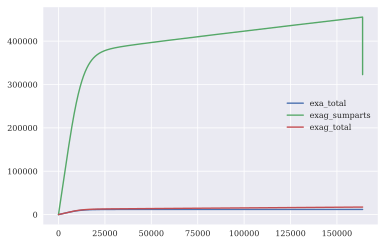

In [18]:
basic.density_df.filter(regex='exa[g]?_[st][a-z]+$').plot(kind='line')

In [19]:
table

,loss,S,exa_total,exa_attrit,exa_paretoccat,exa_lognccat,exag_attrit,exag_paretoccat,exag_lognccat,exag_sumparts,exag_total,lr_attrit,lr_paretoccat,lr_lognccat,lr_total,method,return,lr err
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11011.166809,406.800180,1651.712742,274494.583884,13070.852662,0.902902,0.749836,0.917647,0.9,ph,50.0,-2.353673e-14
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11063.592972,358.473892,1647.624923,300637.128243,13070.852662,0.898623,0.850922,0.919924,0.9,wang,50.0,-1.131539e-12
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11012.157931,408.172080,1649.102551,326779.413379,13070.852658,0.902820,0.747315,0.919100,0.9,lep,50.0,2.782111e-10
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11077.176628,345.334540,1647.181409,352921.958505,13070.852660,0.897521,0.883298,0.920172,0.9,ly,50.0,1.375520e-10
25540.0,25540.0,0.020017,11763.767396,9942.000316,305.033243,1515.689761,11086.303594,336.563909,1646.825075,379064.503655,13070.852662,0.896782,0.906316,0.920371,0.9,clin,50.0,-2.220446e-16


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash
uw = trash.Underwriter(debug=False)

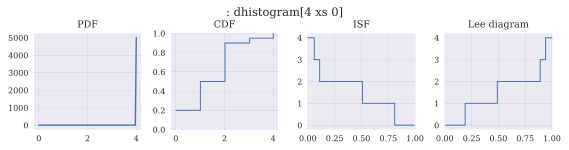

In [2]:
uw('sev stepEg dhistogram xps [0, 1, 2, 3, 4] [.2, .3, .4, .05, .05]  ').plot()

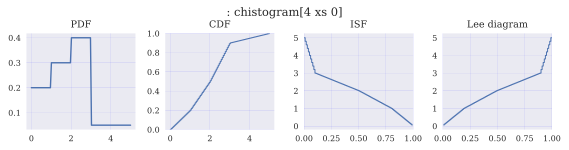

In [5]:
uw('sev stepEg chistogram xps [0, 1, 2, 3, 4] [.2, .3, .4, .05, .05]  ').plot()

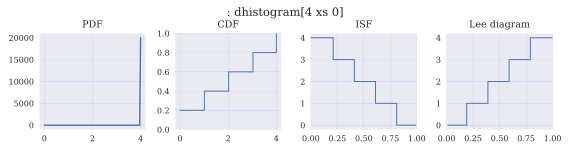

In [3]:
uw('sev stepEg dhistogram xps [0, 1, 2, 3, 4] .2 ').plot()

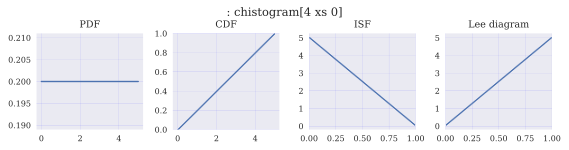

In [4]:
uw('sev stepEg chistogram xps [0, 1, 2, 3, 4] .2 ').plot()

True

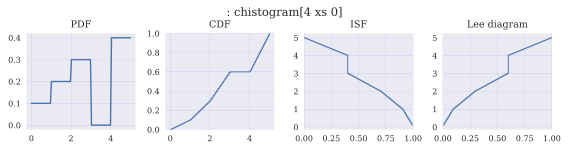

In [6]:
fixed = uw('sev my chistogram xps [0,1,2,3,4] [.1,.2,.3, 0, .4]')
fixed.plot()
fixed.moms()==(2.9000000000000004, 10.449999999999999, 41.825000000000003)

In [9]:
fixed = uw('sev my fixed xps [2] [1]')
fixed.plot()
fixed.moms() == (2, 4, 8)

Parse error in input "sev my >>>fixed xps [2] [1]"
Value fixed of type FIXED not expected


ValueError: Token(type='FIXED', value='fixed', lineno=1, index=7)